<a href="https://colab.research.google.com/github/t3ana/TM_Portfolio/blob/main/TMaloney_Final_Exam_Take_Home_Portion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1**

Text(0, 0.5, 'Value 2')

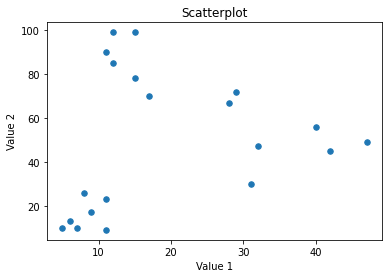

In [ ]:
#Create a Scatterplot
#Import packages
import numpy as np
import matplotlib.pyplot as plt 
from pandas import *
import pandas as pd

#Import Data
Data = read_csv('FinalExamData.csv')
X = Data['Value 1']
Y = Data['Value 2']

#Create the Scatterplot 
plt.scatter(X,Y,s=30) 
ax=plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx=np.linspace(xlim[0],xlim[1])
yy=np.linspace(ylim[0],ylim[1])
XX,YY=np.meshgrid(xx,yy)

#Create Labels
plt.title('Scatterplot')
plt.xlabel('Value 1')
plt.ylabel('Value 2')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


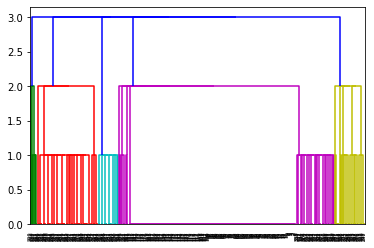

In [ ]:
#Create Dendrogram
#Import Packages
from pandas import *
import pandas as pd
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import numpy as np
import graphviz 
import scipy
from scipy.spatial import distance

#Finding the Distance
Data = np.asarray(Data)
Df = pd.DataFrame(np.zeros((len(Data),len(Data))))
mindist=2
for j in range(0,len(Data)): #rows
  for i in range(j,len(Data)): #columns 
    CurDist=scipy.spatial.distance.cityblock(Data[j,:],Data[i,:]) 
    Df.iloc[j,i]=CurDist
    Df.iloc[i,j]=CurDist
    if CurDist<mindist and i!=j:
      mindist=CurDist

#Creating the Dendrogram
ytdist = pd.DataFrame(np.zeros((1,190)))
pos=0
for i in range(0,len(Df)):
  for j in range(i+1,len(Df)): 
    ytdist[0,pos] = Df.iloc[i,j]
    pos = pos+1

ytdist = np.array(ytdist)
ytdist = ytdist.T
Z = hierarchy.linkage(ytdist,'single')
plt.figure()
dn = hierarchy.dendrogram(Z)

**Explain what you think k should be in order to use K-Means clustering with this data. Use the two previous items (the scatterplot and dendrogram) in your explanation.**

I believe k should be 3 or 4 for the k-means clusterings because in the visual for the scatterplot there were almost 3 separate clusters of data. Although the one on the far right was a little more spaced out than the other data clumps, which made me a little hesitant to say it is 3 and has a possibility of being 4. Moving into the dendrogram, it made a little more clear that the k is more likely to be 4 because when the distance is 2, there are 4 clusters. I knew when the distance was 1 it was individual clusters and at a distance of 3 it all came together as one cluster which ruled out those possibilties.



The lowest SSE is: 1238.2214285714285
The number of iterations required to converge: 2
The first ten predicted cluster values for our data are: [1 1 1 1 1 1 1 3 3 3]
Homogeneity score: 0.2334878126478868
Completeness score: 0.1884820354707767


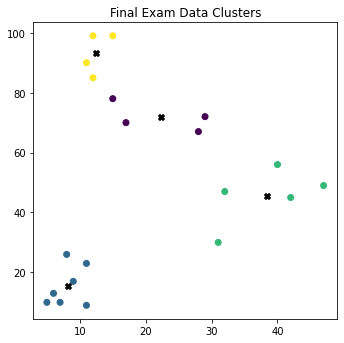

In [ ]:
#Run K-Means
#Import Packages
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn import metrics
from sklearn.datasets import make_blobs 

#Finding Kmeans
random_state=0
X = np.array(Data)
plt.figure(figsize=(12,12))

y_pred = KMeans (n_clusters=4, random_state=random_state).fit_predict(X)
kmeans = KMeans(n_clusters=4, random_state=random_state).fit(X)
cc=kmeans.cluster_centers_

#Plotting Kmeans
plt.subplot(221)
plt.scatter(X[:,0],X[:,1],c=y_pred)
plt.scatter(cc[:,0],cc[:,1],marker="X",c="k")
plt.title("Final Exam Data Clusters")

print("The lowest SSE is:", kmeans.inertia_) 
print("The number of iterations required to converge:", kmeans.n_iter_)
print("The first ten predicted cluster values for our data are:", kmeans.labels_[:10])

KMLabels = kmeans.labels_
HS = metrics.homogeneity_score(Y, KMLabels)
CS = metrics.completeness_score(Y, KMLabels)

print('Homogeneity score:', HS)
print('Completeness score:', CS)

**Discuss if the results produce a good clustering or not. (Do not simply give a yes/no.)**

I believe the results do not produce a good clustering because looking at the SSE it is very high but I know I can't solely base my answer on the inertia score as it can sometimes be inflated. So, I also looked at the homogeneity score, which is the score about clusters only containing members of one class, and the completeness score, which is the score that calculates if members of the same class are in the same cluster. Both of these scores were very low with the homogeneity being 23.24% and completeness being 18.85%. With this in mind, I felt that the clustering was not good although the visual looks decent.

**Task 2**

In [ ]:
#Split into Training set and Testing set
#Import Packages and Data Set
from sklearn.model_selection import train_test_split
GermanData = read_csv("GermanCreditDataEdited.csv")

#Create X and Y
X= [GermanData['LoanDuration'], GermanData['CreditAmount'], GermanData['RateInPercentageOfDisposableIncome'], GermanData['PresentResidenceYears'], 
    GermanData['Age'], GermanData['NumExistingCredits'], GermanData['NumberDependents']]
Y= GermanData['Target']

X= np.asarray(X)
Y= np.asarray(Y)
X=X.T

#Split Data into Train and Test Set
X.shape, Y.shape
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

X_train.shape, Y_train.shape
X_test.shape, Y_test.shape

#Printing Size of Sets
print(Y_test.shape) #tells us how many in the test group
print(Y_train.shape) #tells us how many in the train group

(185,)
(736,)


In [ ]:
#Train either a tree or a random forest on only the numeric values in the attributes
#Import Packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

#Create Random Forest Model
model=RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train,Y_train)
predictions=model.predict(X_test)

#Create Confusion Matrix for Accuracy
confusion_matrix(predictions,Y_test)

array([[128,  47],
       [  1,   9]])

In [ ]:
#Conducting Majority Classsifier 
print("Good Target", GermanData['Target'].value_counts()[1])
print("Bad Target", GermanData['Target'].value_counts()[2])


Good Target 650
Bad Target 271


**Discuss the accuracy of your model. Please do more than state the accuracy and whether or not you think it is acceptable.**

I believe the accuracy of my model is acceptable because the percentage of predicted correctly is above the baseline. I used the confusion matrix to help calculate the amount predicted correctly, predicted as bad, and predicted as good in the test portion of the data. Out of the 185 pieces of data, it was able to correctly predict 74.05% of it. I compared this to a majority classifier using the whole dataset as a baseline. I took 650, which is the amount of good targets, and divided that by 921, the full amount of data values in the set, to get an accuracy of 73.5%. By comparing my model to the baseline, I am able to conclude that my accuracy is acceptable but there is probaably room for improvement seeing as it is still relatively close to the baseline accuracy prediction.

**Discuss the dangers of making an error mislabeling someone as a good credit risk or bad credit risk. Is one error more costly than the other? If so, why? If not, why not?**

By misclassifying someone as good or bad you are potentially making a costly decision that could effect the business. Both could hurt potential profit and credibility, but mislabeling someone as good credit risk is a more costly error than mislabeling someone as a bad credit risk. By mislabeling a good credit as bad, you are simply going to deny them business or not target them as potential clients. However, if you mislabel a bad credit risk as a good credit risk, you will target bad. You will have to deal with any damage they cause such as not paying or being behind on payments. Therefore, you have to pay and lose money rather than see a potential gain.